# Сортировка Шелла #

In [1]:
import numpy as np
import pylab as pl
from timeit import default_timer as timer
import random as rand


#### Последовательность Седгевика ####

$$h_s=\begin{cases}
9 \cdot 2^s -9 \cdot 2^{\frac{s}{2}}+1 , s-четно  \\
8\cdot 2^s -6 \cdot 2^{\frac{s+1}{2}}+1 , s-нечетно 
\end{cases}
$$

In [2]:
def Sedgewicksequence(s):
    if s%2==0:
        return int(9*2**s-9*2**(s/2)+1)
    else :
        return int(8*2**s-6*2**((s+1)/2)+1)

In [3]:
def ShellSort(array,sedgewicksequence,t):
    T=1
    while T<len(array):
        T=Sedgewicksequence(t)
        sedgewicksequence.append(T)
        t=t+1
    t0 = timer()
    for h in reversed(sedgewicksequence):
        for j in range(h,len(array)):
            i=j-h
            while i>=0 and array[i]>array[i+h]:
                array[i], array[i+h] = array[i+h], array[i]
                i -= h
    return (timer()-t0),sedgewicksequence,t


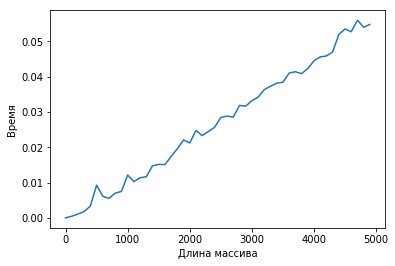

In [8]:
n_array=[]
time_array=[]
N=np.arange(0,5000,100)

t=1
sedgewicksequence=[]
sedgewicksequence.append(1)
for n in N:
    array=np.array([rand.randint(0, n) for i in range(0, n)])
    tm,sedgewicksequence,t=ShellSort(array,sedgewicksequence,t)
    time_array.append(tm)
     
pl.plot(N,time_array)
pl.xlabel('Длина массива')
pl.ylabel('Время')
pl.show()